In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


# Data Preparation

In [2]:
houses_data = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')

In [3]:
houses_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(houses_data.shape)

(1460, 81)


In [5]:
print (houses_data.isna().sum()[lambda x: x > 0])

print("Percentage of NaN values in all data", ((houses_data.isna().sum().sum() / np.product(houses_data.shape) * 100))) # 7% of NaN values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Percentage of NaN values in all data 6.620158971757145


In [6]:
NaN_percentage = ((houses_data.isna().sum() / houses_data.shape[0] * 100)[lambda x: x > 0])
print (NaN_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [7]:
houses_data = houses_data.drop(columns=houses_data.select_dtypes(include=["object", "category"]).columns)


In [8]:
# Check for NaN values
print (houses_data.isna().sum()[lambda x: x > 0])


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [9]:
houses_data.drop(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], inplace=True, axis=1)

In [10]:
from sklearn.model_selection import train_test_split

y = houses_data['SalePrice']
houses_data = houses_data.drop('SalePrice', axis=1)

X = houses_data

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Model Building

In [11]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

def get_score(n_estimators, lr, X_train, y_train, X_valid, y_valid):
    model = XGBRegressor(
        n_estimators=n_estimators,
        learning_rate=lr,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

results = {
    n: get_score(n, 0.01, X_train, y_train, X_valid, y_valid)
    for n in range(50, 600, 50)
}

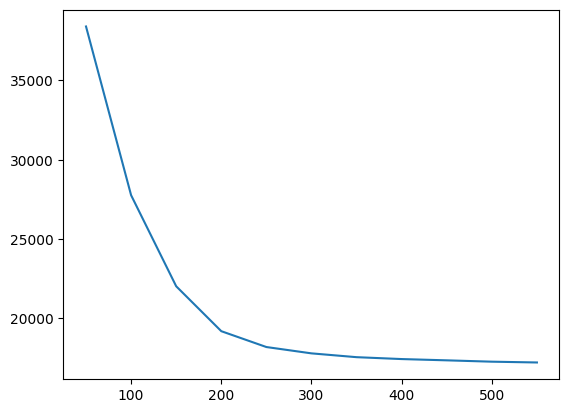

In [12]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [13]:
my_model = XGBRegressor(n_estimators=300, learning_rate=0.01, random_state=4815162342)

my_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=4815162342, ...)

# Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

Mean Absolute Error: 17777.720515839042
